# WeatherPy
----

### Analysis
*In the plot, Latitude vs. Temperature, it reinforces that the closer to the equator the hotter the temperature. However, the temperature is not at its maximum at the 0 degree mark but at 20 degrees latitude. This might be accounted for by the earth's tilt at this time of year. 
*In the plot, Latitude vs. Humidity, there's not an obvious conclusion. At this time of year, there seems to be higher humidity in general. However, there seems to be a drop in humidity for a handful of cities around -20 degrees latitude and 30-40 degrees latitude. Through further exploration there could be a connection between those cities.
*In the plot, Latitude vs. Wind Speed, most cities have a low wind speed. The outliers could be explained by being located on a coast, not having tree coverage, or having a fairly flat terrain. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Begin printing log
print("Beginning Data Retrieval:")
print("-------------------------")

#Create empty list to hold city data and counters for looping
city_list = []
loop_counter = 0
set_counter= 1
record_counter = 1

#Loop through the list of cities and print out in sets of 50
for city in cities:
    if (loop_counter % 50 == 0 and loop_counter >=50):
        record_counter = 1
        set_counter += 1
    
    loop_counter += 1
    
    print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
    record_counter += 1
    
    #API request for each city and store into data list
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q={city}"
    
    #Use a try to retrieve information about each city and an except to skip any cities with missing information
    try:
        weather = requests.get(url).json()
        date = weather["dt"]
        latitude = weather["coord"]["lat"]
        longitude = weather["coord"]["lon"]
        humidity = weather["main"]["humidity"]
        max_temp = weather["main"]["temp_max"]
        clouds = weather["clouds"]["all"]
        wind_speed = weather["wind"]["speed"]
        country = weather["sys"]["country"]
        
        city_list.append({
            "Date": date,
            "City": city,
            "Latitude": latitude,
            "Longitude": longitude,
            "Humidity": humidity,
            "Cloudiness": clouds,
            "Wind Speed": wind_speed,
            "Maximum Temp": max_temp,
            "Country": country
        })
        
    except:
        print("City not found. Skipping.")
        pass
    
    
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")
        
        

Beginning Data Retrieval:
-------------------------
Processing Record 1 of Set 1 | dvinskoy
Processing Record 2 of Set 1 | san francisco
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | kokuy
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | kurchum
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping.
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | san quintin
Processing Record 15 of Set 1 | oriximina
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping.
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | sakakah
City not found. Skipping.
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | albany
Proc

Processing Record 39 of Set 4 | sentyabrskiy
City not found. Skipping.
Processing Record 40 of Set 4 | buala
Processing Record 41 of Set 4 | kamaishi
Processing Record 42 of Set 4 | saleaula
City not found. Skipping.
Processing Record 43 of Set 4 | craig
Processing Record 44 of Set 4 | kasama
Processing Record 45 of Set 4 | namtsy
Processing Record 46 of Set 4 | kannur
Processing Record 47 of Set 4 | longlac
City not found. Skipping.
Processing Record 48 of Set 4 | reitz
Processing Record 49 of Set 4 | ahuimanu
Processing Record 50 of Set 4 | san ciro de acosta
Processing Record 1 of Set 5 | lovington
Processing Record 2 of Set 5 | alta floresta
Processing Record 3 of Set 5 | cabra
Processing Record 4 of Set 5 | norman wells
Processing Record 5 of Set 5 | beringovskiy
Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | bambous virieux
Processing Record 8 of Set 5 | ndola
Processing Record 9 of Set 5 | navahrudak
Processing Record 10 of Set 5 | samusu
City not found. Ski

Processing Record 13 of Set 12 | senador jose porfirio
Processing Record 14 of Set 12 | touros
Processing Record 15 of Set 12 | bousso
City not found. Skipping.
Processing Record 16 of Set 12 | daru
Processing Record 17 of Set 12 | waycross
Processing Record 18 of Set 12 | tynda
Processing Record 19 of Set 12 | biloela
Processing Record 20 of Set 12 | arman
Processing Record 21 of Set 12 | ugoofaaru
Processing Record 22 of Set 12 | tupik
Processing Record 23 of Set 12 | muhos
Processing Record 24 of Set 12 | ballina
Processing Record 25 of Set 12 | makakilo city
Processing Record 26 of Set 12 | cherskiy
Processing Record 27 of Set 12 | madimba
Processing Record 28 of Set 12 | yomitan
City not found. Skipping.
Processing Record 29 of Set 12 | drummondville
Processing Record 30 of Set 12 | loubomo
City not found. Skipping.
Processing Record 31 of Set 12 | marshall
Processing Record 32 of Set 12 | bolungarvik
City not found. Skipping.
Processing Record 33 of Set 12 | biltine
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_pd = pd.DataFrame(city_list)
city_pd.to_csv("weather_table.csv")
city_pd.count()

City            548
Cloudiness      548
Country         548
Date            548
Humidity        548
Latitude        548
Longitude       548
Maximum Temp    548
Wind Speed      548
dtype: int64

In [5]:
city_pd.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temp,Wind Speed
0,dvinskoy,14,RU,1565580469,79,62.16,45.12,38.85,5.99
1,san francisco,100,CO,1565580470,95,1.17,-76.88,49.65,1.43
2,yellowknife,20,CA,1565580407,59,62.45,-114.38,62.60,5.82
3,bredasdorp,6,ZA,1565580470,71,-34.53,20.04,53.60,11.41
4,kokuy,33,RU,1565580470,49,52.20,117.55,75.57,8.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

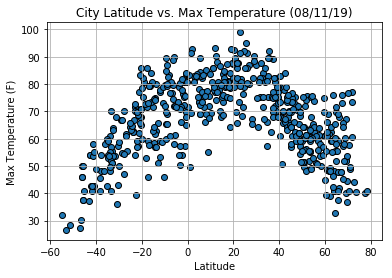

In [6]:
#Latitude vs Temperature scatter plot
plt.scatter(city_pd["Latitude"], city_pd["Maximum Temp"], edgecolor="black", marker="o", label="Cities")

#Plot labels and title
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("Lat_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

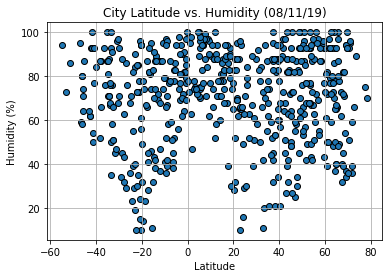

In [7]:
#Latitude vs Temperature scatter plot
plt.scatter(city_pd["Latitude"], city_pd["Humidity"], edgecolor="black", marker="o", label="Cities")

#Plot labels and title
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Lat_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

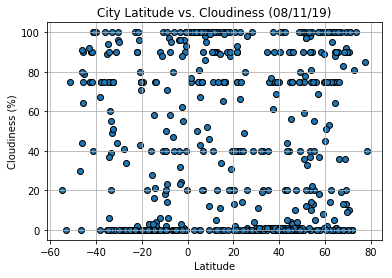

In [8]:
#Latitude vs Temperature scatter plot
plt.scatter(city_pd["Latitude"], city_pd["Cloudiness"], edgecolor="black", marker="o", label="Cities")

#Plot labels and title
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Lat_Cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

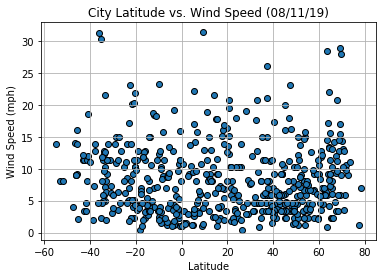

In [9]:
#Latitude vs Temperature scatter plot
plt.scatter(city_pd["Latitude"], city_pd["Wind Speed"], edgecolor="black", marker="o", label="Cities")

#Plot labels and title
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Lat_Wind.png")
plt.show()